In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[Point(x=466, y=302),
 Point(x=634, y=302),
 Point(x=556, y=413),
 Point(x=359, y=253),
 Point(x=334, y=92),
 Point(x=463, y=185),
 Point(x=630, y=187),
 Point(x=751, y=94),
 Point(x=727, y=255)]

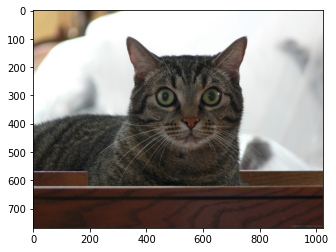

In [24]:
from core.utils import Path, AnnotatedImage
from core import utils
import numpy as np
from matplotlib import pyplot as plt

def show_image(path: Path):
    plt.imshow(utils.parse_image(path))

standard_cat_path = utils.Paths.INPUT_PATH / "CAT_00" / "00000055_003.jpg"
standard_cat = AnnotatedImage.from_image_path(standard_cat_path)

show_image(standard_cat.image)
standard_cat.points

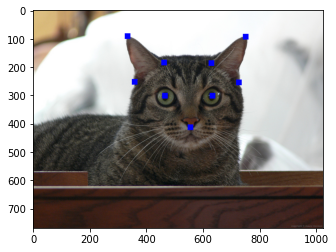

In [25]:
temp_cat = utils.parse_image(standard_cat.image)

for point in standard_cat.points:
    # NOTE that x and y are flipped!
    temp_cat[point.y-10: point.y+10, point.x-10: point.x+10] = [0,0,255]

plt.imshow(temp_cat)

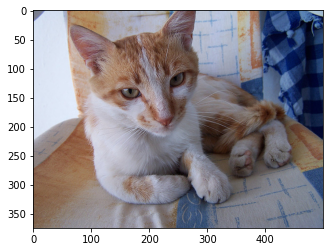

In [26]:
gen = utils.Paths.gen_files()
test_cat = next(gen)
test_cat = next(gen)

test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
test_cat = next(gen)
show_image(test_cat.image)

In [27]:
parsed = utils.parse_image(standard_cat.image)
standard_points = utils.Point.to_np(standard_cat.points)[:, [1, 0]] # flip x and y
standard_points

array([[302, 466],
       [302, 634],
       [413, 556],
       [253, 359],
       [ 92, 334],
       [185, 463],
       [187, 630],
       [ 94, 751],
       [255, 727]])

In [28]:
test_points = utils.Point.to_np(test_cat.points)[:, [1, 0]] # flip x and y
test_points

array([[140, 167],
       [119, 245],
       [198, 230],
       [109, 104],
       [ 24,  67],
       [ 60, 142],
       [ 42, 218],
       [-41, 277],
       [ 68, 272]])

In [29]:
one_col = np.ones((9, 1))

# add column of 1s to make all transformation done by multiplication
# this supports translation
standard = np.append(standard_points, one_col, 1)
test = np.append(test_points, one_col, 1)

# standard = test @ X
from numpy import linalg 

x, residuals, rank, singlar = linalg.lstsq(a=test, b=standard, rcond=None) # a @ x = b
x

array([[ 1.42521951e+00, -4.76177519e-01,  2.19622425e-17],
       [ 4.05136032e-01,  1.94070222e+00, -5.20417043e-18],
       [ 4.00692139e+01,  2.13386935e+02,  1.00000000e+00]])

In [30]:
test @ x 

array([[307.25766262, 470.81935295,   1.        ],
       [308.92866344, 632.19385389,   1.        ],
       [415.44396421, 565.46529663,   1.        ],
       [237.55228778, 363.31661626,   1.        ],
       [101.41859627, 331.98572326,   1.        ],
       [183.11170105, 460.39599898,   1.        ],
       [188.24808834, 616.46056292,   1.        ],
       [ 93.85789495, 770.48472787,   1.        ],
       [247.18114133, 708.87786724,   1.        ]])

In [31]:
np.rint(test @ x).astype(int)

array([[307, 471,   1],
       [309, 632,   1],
       [415, 565,   1],
       [238, 363,   1],
       [101, 332,   1],
       [183, 460,   1],
       [188, 616,   1],
       [ 94, 770,   1],
       [247, 709,   1]])

In [32]:
standard_parsed = utils.parse_image(standard_cat.image)
test_parsed = utils.parse_image(test_cat.image)
standard_parsed.shape

(768, 1024, 3)

In [33]:
h, w, _ = test_parsed.shape
print(h, w)
import itertools
gen = itertools.product(range(1, h+1), range(1, w+1))
test_all_points_2d = np.array(list(gen)).astype(int)
test_all_points_3d = np.append(test_all_points_2d, np.ones((h * w, 1)), 1)
test_all_points_3d

375 500


array([[  1.,   1.,   1.],
       [  1.,   2.,   1.],
       [  1.,   3.,   1.],
       ...,
       [375., 498.,   1.],
       [375., 499.,   1.],
       [375., 500.,   1.]])

In [34]:
new_points = np.rint(test_all_points_3d @ x).astype(int)
new_points

array([[  42,  215,    1],
       [  42,  217,    1],
       [  43,  219,    1],
       ...,
       [ 776, 1001,    1],
       [ 777, 1003,    1],
       [ 777, 1005,    1]])

In [35]:
new_points[:, 0].max()

777

In [36]:
# translate back to start from 0

prev_loc = test_all_points_2d.astype(int) - 1
new_loc = (new_points - 1) 
prev_x, prev_y = prev_loc[:, 0], prev_loc[:, 1]

new_x = (new_loc[:, 0] * h / new_loc[:, 0].max()).astype(int)
new_y = (new_loc[:, 1] * w / new_loc[:, 1].max()).astype(int)

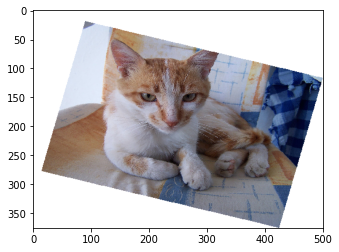

In [37]:
new_image = np.zeros([new_x.max() + 1, new_y.max() + 1, 3]).astype(int) + 255
new_image[new_x, new_y] = test_parsed[prev_x, prev_y]
new_image
plt.imshow(new_image)

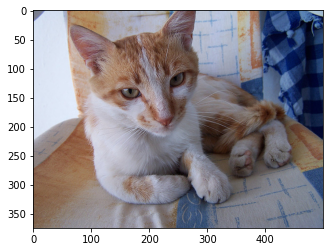

In [38]:
plt.imshow(test_parsed)

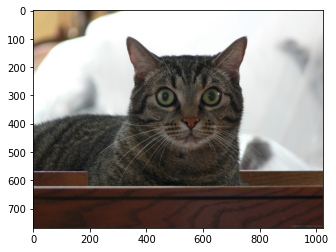

In [39]:
plt.imshow(standard_parsed)

In [40]:
standard_points[0, :]

array([302, 466])

In [41]:
test_points[0, :]

array([140, 167])

In [42]:
test_parsed[145, 179]

array([83, 56, 45], dtype=uint8)

In [43]:
test_all_points_2d[144*w + 178: 145*w]

array([[145, 179],
       [145, 180],
       [145, 181],
       [145, 182],
       [145, 183],
       [145, 184],
       [145, 185],
       [145, 186],
       [145, 187],
       [145, 188],
       [145, 189],
       [145, 190],
       [145, 191],
       [145, 192],
       [145, 193],
       [145, 194],
       [145, 195],
       [145, 196],
       [145, 197],
       [145, 198],
       [145, 199],
       [145, 200],
       [145, 201],
       [145, 202],
       [145, 203],
       [145, 204],
       [145, 205],
       [145, 206],
       [145, 207],
       [145, 208],
       [145, 209],
       [145, 210],
       [145, 211],
       [145, 212],
       [145, 213],
       [145, 214],
       [145, 215],
       [145, 216],
       [145, 217],
       [145, 218],
       [145, 219],
       [145, 220],
       [145, 221],
       [145, 222],
       [145, 223],
       [145, 224],
       [145, 225],
       [145, 226],
       [145, 227],
       [145, 228],
       [145, 229],
       [145, 230],
       [145,

In [44]:
new_points[144*w + 178: 145*w]

array([[ 319,  492,    1],
       [ 320,  494,    1],
       [ 320,  496,    1],
       [ 320,  498,    1],
       [ 321,  499,    1],
       [ 321,  501,    1],
       [ 322,  503,    1],
       [ 322,  505,    1],
       [ 322,  507,    1],
       [ 323,  509,    1],
       [ 323,  511,    1],
       [ 324,  513,    1],
       [ 324,  515,    1],
       [ 325,  517,    1],
       [ 325,  519,    1],
       [ 325,  521,    1],
       [ 326,  523,    1],
       [ 326,  525,    1],
       [ 327,  527,    1],
       [ 327,  529,    1],
       [ 327,  531,    1],
       [ 328,  532,    1],
       [ 328,  534,    1],
       [ 329,  536,    1],
       [ 329,  538,    1],
       [ 329,  540,    1],
       [ 330,  542,    1],
       [ 330,  544,    1],
       [ 331,  546,    1],
       [ 331,  548,    1],
       [ 331,  550,    1],
       [ 332,  552,    1],
       [ 332,  554,    1],
       [ 333,  556,    1],
       [ 333,  558,    1],
       [ 333,  560,    1],
       [ 334,  562,    1],
 

In [45]:
test_parsed[145, 179]

array([83, 56, 45], dtype=uint8)

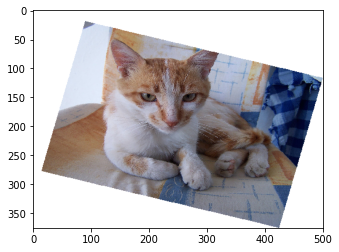

In [46]:
plt.imshow(new_image)